In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

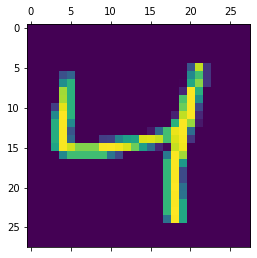

In [ ]:
plt.matshow(x_train[2])

In [ ]:
x_train.shape

(60000, 28, 28)

**RESHAPE** 

In [ ]:
x_train_flat=x_train.reshape(len(x_train),x_train.shape[1]*x_train.shape[2])


In [ ]:
x_test_flat=x_test.reshape(len(x_test),x_test.shape[1]*x_test.shape[2])

In [ ]:
x_train_flat=x_train_flat/255
x_test_flat=x_test_flat/255

**ANN MODEL BUILDING**

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(x_train_flat,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7051 - accuracy: 0.8171
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3158 - accuracy: 0.9121
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9211
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2721 - accuracy: 0.9229
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9246
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2662 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2554 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2512 - accuracy: 0.9297
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2550 - accuracy: 0.9305
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.248

**ANN MODEL**

In [ ]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2620 - accuracy: 0.9269


[0.2619515657424927, 0.9269000291824341]

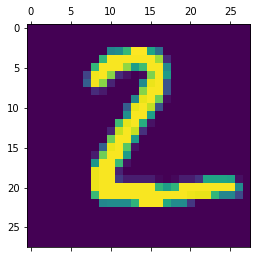

In [ ]:
plt.matshow(x_test[1])

In [ ]:
pred1=model.predict(x_test_flat)


In [ ]:
pred1[1]

array([9.2359092e-05, 9.8008309e-07, 9.9625337e-01, 2.9408497e-05,
       4.5603301e-15, 1.6266662e-03, 1.9844614e-03, 3.3330948e-19,
       1.2673720e-05, 1.2589981e-15], dtype=float32)

In [ ]:
np.argmax(pred1[1])

2

In [ ]:
y_prediction=[np.argmax(i) for i in pred1]


In [ ]:
y_prediction[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm=tf.math.confusion_matrix(y_test,y_prediction)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    7,    7,    2,    1,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   4,    8,  933,   14,    8,    4,   11,   11,   34,    5],
       [   2,    0,   21,  914,    1,   30,    2,   10,   20,   10],
       [   1,    1,    5,    2,  919,    0,    7,    4,    9,   34],
       [   8,    2,    3,   29,   10,  790,   13,    7,   25,    5],
       [  12,    3,    9,    1,    7,   16,  907,    1,    2,    0],
       [   1,    6,   24,    2,    9,    1,    0,  942,    2,   41],
       [   6,   10,    6,   19,    9,   33,    9,    9,  858,   15],
       [  10,    7,    1,    8,   23,    5,    0,   17,    7,  931]],
      dtype=int32)>

<function matplotlib.pyplot.show>

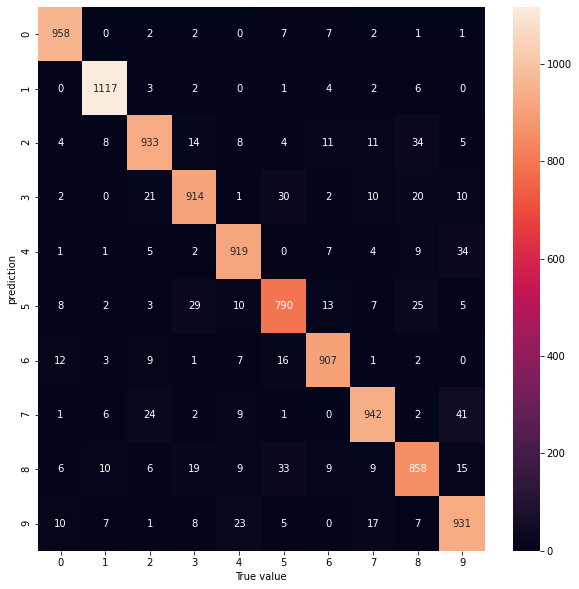

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("True value")
plt.ylabel("prediction")
plt.show

**ANN Model 2 with hidden layer** 

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(x_train_flat,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4635 - accuracy: 0.8694
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1361 - accuracy: 0.9605
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0904 - accuracy: 0.9731
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9803
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9846
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0397 - accuracy: 0.9882
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0306 - accuracy: 0.9909
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0249 - accuracy: 0.9928
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0198 - accuracy: 0.9939
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [ ]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0979 - accuracy: 0.9769


[0.09785813838243484, 0.9768999814987183]

In [ ]:
pred2=model.predict(x_test_flat)

In [ ]:
pred2[0]

array([5.3530574e-12, 1.8113417e-14, 4.2715942e-11, 1.4700162e-06,
       2.7578061e-15, 4.8579396e-12, 5.1642598e-24, 9.9999678e-01,
       1.0877150e-10, 1.8110001e-06], dtype=float32)

In [ ]:
y_new_prediction=[np.argmax(i) for i in pred2]
y_new_prediction[:5]

[7, 2, 1, 0, 4]

In [ ]:
new_confusion=tf.math.confusion_matrix(y_test,y_new_prediction)
new_confusion

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    1,    1,    0,    6,    1,    1,    0],
       [   0, 1125,    2,    2,    0,    1,    2,    1,    2,    0],
       [   5,    3,  997,    4,    4,    0,    3,    7,    9,    0],
       [   0,    0,    3,  993,    0,    3,    0,    4,    0,    7],
       [   1,    0,    3,    1,  954,    0,    4,    3,    0,   16],
       [   3,    0,    0,    8,    1,  867,    8,    0,    2,    3],
       [   2,    1,    0,    1,    3,    5,  945,    0,    1,    0],
       [   1,    3,    6,    3,    1,    0,    0, 1006,    1,    7],
       [   2,    1,    4,    9,    5,    6,    4,    6,  932,    5],
       [   3,    3,    0,    4,    7,    5,    1,    4,    1,  981]],
      dtype=int32)>

**Classification report**

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(x_test_flat)
y_pred_classes = [np.argmax(element) for element in pred2]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
history = model.fit(
  x_train_flat,
  y_train,
  epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - accuracy: 0.9970
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0077 - accuracy: 0.9974
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0078 - accuracy: 0.9976
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0059 - accuracy: 0.9983
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0052 - accuracy: 0.9985
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0056 - accuracy: 0.9984
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0046 - accuracy: 0.9988
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0058 - accuracy: 0.9982
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.004

In [ ]:
epochs =15
acc = history.history['accuracy']
val_acc = history.history['valaccuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

KeyError: ignored

<function matplotlib.pyplot.show>

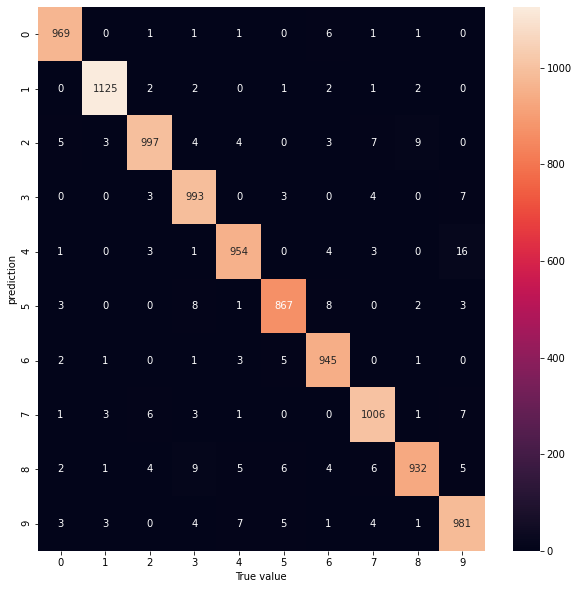

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(new_confusion,annot=True,fmt='d')
plt.xlabel("True value")
plt.ylabel("prediction")
plt.show

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 7.6037 - accuracy: 0.8102
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4585 - accuracy: 0.8910
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3188 - accuracy: 0.9211
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2702 - accuracy: 0.9317
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2424 - accuracy: 0.9365
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2275 - accuracy: 0.9405
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2067 - accuracy: 0.9467
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1944 - accuracy: 0.9485
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1865 - accuracy: 0.9518
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.176